<a href="https://colab.research.google.com/github/RamanRed/ACM/blob/master/Session1_A_SipakMed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/SipakMed_5_Slide1'))


['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0', '.Encrypted']
['link to share folder to my drive with shortcut.docx', 'Session2_A_LIME_implementation Executed.ipynb', 'Session1_A_SipakMed.ipynb', 'validation', 'train', 'test', 'model']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
shared_folder_path = '/content/drive/MyDrive/Colab Notebooks/SipakMed_5_Slide1' #change the dataset folder
print(os.listdir(shared_folder_path))


['link to share folder to my drive with shortcut.docx', 'Session2_A_LIME_implementation Executed.ipynb', 'Session1_A_SipakMed.ipynb', 'validation', 'train', 'test', 'model']


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os


In [6]:

train_path = f"{shared_folder_path}/train"
validation_path = f"{shared_folder_path}/validation"


In [7]:
model_name = 'resnet18'
no_class = 5
epochs = 10


In [8]:
# Model Selection
if model_name == 'resnet18':
    h, w = 224, 224
    net = torchvision.models.resnet18()
    net.fc = nn.Linear(net.fc.in_features, no_class)
elif model_name=='resnet34':
    h,w=224,224
    net= torchvision.models.resnet34()
    net.fc=nn.Linear(net.fc.in_features, no_class)

In [9]:
# TRANSFORM
transform = transforms.Compose([
    transforms.Resize((h, w)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [ ]:
# Load Data
train_data = datasets.ImageFolder(train_path, transform)
validation_data = datasets.ImageFolder(validation_path, transform)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, num_workers=2)
validation_loader = DataLoader(validation_data, batch_size=8, shuffle=False, num_workers=2)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)


In [ ]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

# Training Loop
min_validation = float('inf')
train_loss_vs_epoch = []
validation_loss_vs_epoch = []
save_path = f"{shared_folder_path}/model"
os.makedirs(save_path, exist_ok=True)

Epoch 1/10
  Batch 10/15: Loss = 1.176839
Model saved with validation loss: 1.312111
[Epoch 1] Train Loss: 1.271854, Val Loss: 1.312111
Epoch 2/10
  Batch 10/15: Loss = 0.563575
Model saved with validation loss: 1.290828
[Epoch 2] Train Loss: 0.735404, Val Loss: 1.290828
Epoch 3/10
  Batch 10/15: Loss = 0.288638
Model saved with validation loss: 1.169583
[Epoch 3] Train Loss: 0.576575, Val Loss: 1.169583
Epoch 4/10
  Batch 10/15: Loss = 0.548424
Model saved with validation loss: 0.678718
[Epoch 4] Train Loss: 0.407939, Val Loss: 0.678718
Epoch 5/10
  Batch 10/15: Loss = 0.615674
[Epoch 5] Train Loss: 0.387401, Val Loss: 1.164985
Epoch 6/10
  Batch 10/15: Loss = 0.405372
Model saved with validation loss: 0.583997
[Epoch 6] Train Loss: 0.275924, Val Loss: 0.583997
Epoch 7/10
  Batch 10/15: Loss = 0.037540
[Epoch 7] Train Loss: 0.273610, Val Loss: 0.705298
Epoch 8/10
  Batch 10/15: Loss = 0.182652
[Epoch 8] Train Loss: 0.225962, Val Loss: 1.305520
Epoch 9/10
  Batch 10/15: Loss = 0.246083

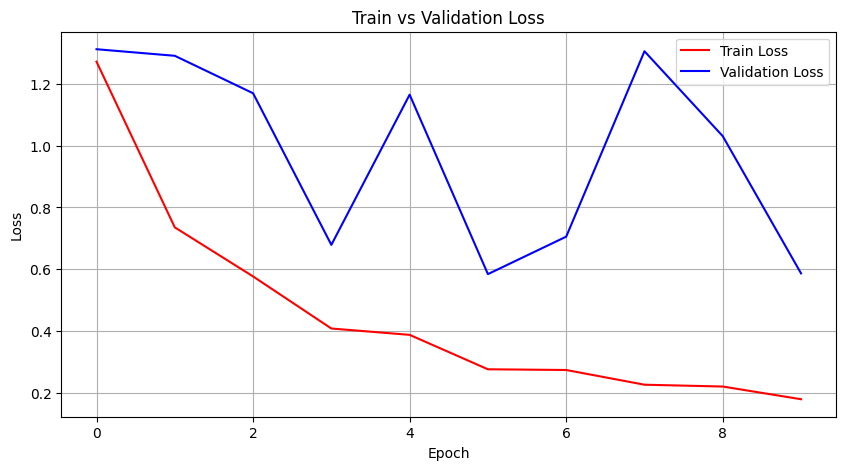

In [ ]:
# Training Loop
for epoch in range(epochs):
    train_loss = 0.0
    net.train()  # Enable training mode
    print(f"Epoch {epoch + 1}/{epochs}")

    # Training phase
    for batch_idx, (inputs, labels) in enumerate(train_loader, 1):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        if batch_idx % 10 == 0:  # Log every 10 batches
            print(f"  Batch {batch_idx}/{len(train_loader)}: Loss = {loss.item():.6f}")

    avg_train_loss = train_loss / len(train_loader)
    train_loss_vs_epoch.append(avg_train_loss)

    # Validation phase
    validation_loss = 0.0
    net.eval()  # Enable evaluation mode
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

    avg_validation_loss = validation_loss / len(validation_loader)
    validation_loss_vs_epoch.append(avg_validation_loss)

    # Save the model if validation loss improves
    if avg_validation_loss < min_validation:
        min_validation = avg_validation_loss
        torch.save(net, f"{save_path}/{model_name}.pt")
        print(f"Model saved with validation loss: {min_validation:.6f}")

    print(f"[Epoch {epoch + 1}] Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_validation_loss:.6f}")

# Plot and save loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_loss_vs_epoch, 'r', label='Train Loss')
plt.plot(validation_loss_vs_epoch, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig(f"{save_path}/plot_{model_name}.png")
plt.show()
